# Credit card fraud detection Analysis using transactions dataset

In [135]:
# Dataset reference: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
dataset = pd.read_csv('creditcard.csv')

In [138]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [139]:
#To know the no.of rows and columns
dataset.shape

(284807, 31)

In [140]:
# To check if there is any null values in dataset
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [141]:
#counting the distinct values in dependent variable i.e.,Class
pd.value_counts(dataset['Class'])

0    284315
1       492
Name: Class, dtype: int64

C:\Users\91954\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

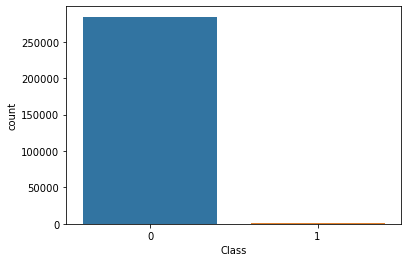

In [142]:
#ploting the Class field values using seaborn
sns.countplot(dataset['Class'])

#### Above graph is an example for imbalanced dataset since zeor's count is higher than one's

In [143]:
# finding count for non-fraudulent transaction
len(dataset[dataset['Class']==0])

284315

In [145]:
# finding count for fraudulent transaction
len(dataset[dataset['Class']==1])

492

#### The difference in count of above results shows the dataset is imbalanced

In [146]:
# creating the feature matrix and dependent variable vector
x = dataset.iloc[:,:-1].values # here it takes all rows and cloumn values except the last column
y = dataset.iloc[:,-1].values # here it takes all rows and only last column values

In [147]:
x

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811730e-02, ...,
         1.33558377e-01, -2.10530530e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309900e-03,  1.47241690e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518410e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477200e-03, -2.65608290e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530900e-03,  1.36489140e-02,  2.17000000e+02]])

In [148]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
# downloading the imblearn module from imbalanced-learn module
#!pip install imbalanced-learn

In [149]:
# Converting the imbalanced data set into balanced dataset, here we are using over-sampling means 
# increasing the fraudulent transactions count to non-fraudulent transactions
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_res, y_res = ros.fit_resample(x,y)

In [150]:
# Old sample shape
x.shape

(284807, 30)

In [152]:
# resampled feature shape
x_res.shape

(568630, 30)

In [154]:
# using counter to find how many times a value repeated from data in dictionary format
from collections import Counter
print(Counter(y))
print(Counter(y_res))

Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 284315})


#### From above y_res we can understand that data has been changed to balanced dataset. because zero's and one's are having same count of values

In [155]:
# Dividing the dataset into train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=42)

In [156]:
# checking the shape of x & y train
print("shape of X_train is:",x_train.shape)
print("shape of y_train is:",y_train.shape)

shape of X_train is: (398041, 30)
shape of y_train is: (398041,)


In [157]:
# Checking the shape of x & y test
print("shape of X_test is:",x_test.shape)
print("shape of y_test is:",y_test.shape)

shape of X_test is: (170589, 30)
shape of y_test is: (170589,)


In [158]:
# Using RandomForest Algoritm model, it consists of default 10 decision trees which called n_estimators
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 641, random_state= 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=641, random_state=0)

In [176]:
# Now passing the test data to the model to predect the Class field data
y_pred = classifier.predict(x_test)

In [177]:
# now comparing how many errors/ difference in result between y_pred (model predicted data) and y_test(actual data)
n_errors = (y_pred != y_test).sum()

In [178]:
n_errors

7

In [180]:
y_pred.shape

(170589,)

In [181]:
y_test.shape

(170589,)

Final accuracy of the model for the given test data is: 99.99589657011883%


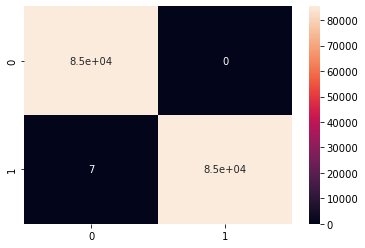

In [183]:
# finding the accuracy score and ploting the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
confmatrix = confusion_matrix(y_pred, y_test)
sns.heatmap(confmatrix, annot= True)  # annot is used to print text on the map
print("Final accuracy of the model for the given test data is: {0}%".format(accuracy_score(y_test, y_pred)*100))

In [184]:
# finding the precision Scores means true_positives/ true_positives +false_positives
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9999180778728335

In [185]:
# finding precision recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

1.0

In [186]:
# This function will create the list of name's starts with 'V'
def fun(num):
    arr = []
    for i in range(1,num):
        x = 'v'+ str(i)
        arr.append(x)
    return arr
list1 = fun(31)
print(list1)

['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30']


In [187]:
# converting the numpy n-dimentional array into pandas dataframe
df_x_test = pd.DataFrame(x_test, columns = list1)
df_x_test.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30
0,56650.0,-8.762083,2.791030,-7.682767,6.991214,-5.230695,-0.357388,-9.685621,1.749335,-4.495679,...,-0.460390,-0.090527,0.348590,0.051132,-0.415430,0.219665,0.330020,-0.028252,-0.156270,7.52
1,151972.0,-6.618211,3.835943,-6.316453,1.844111,-2.476892,-1.886718,-3.817495,0.613470,-1.482121,...,-0.953827,1.636622,0.038727,0.278218,0.786670,0.063895,0.154707,-2.042403,1.405141,57.73
2,4267.0,-0.851994,0.935553,2.188136,0.709286,0.178930,-0.349335,0.857609,-0.416252,1.066375,...,0.270933,-0.411022,-0.404762,-0.096893,0.404476,0.377388,0.344173,-0.000311,-0.125090,30.53
3,77182.0,-1.410852,2.268271,-2.297554,1.871331,0.248957,-1.208799,-1.358648,1.102916,-1.317364,...,0.058063,0.155381,-0.614880,-0.196126,-0.464376,0.118473,-0.484537,0.373596,0.187657,1.00
4,97121.0,-17.976266,12.864989,-19.575066,11.345120,-13.998646,-0.354900,-23.783470,-4.872353,-8.504285,...,2.419921,-4.300432,2.865772,1.489302,0.386039,-0.232392,0.413827,-3.255981,-0.538963,8.64


In [188]:
df_y_test = pd.DataFrame(y_test, columns = ['class_y_actual'])
df_y_test.head()

,class_y_actual
0,1
1,1
2,0
3,1
4,1


In [190]:
df_y_pred = pd.DataFrame(y_pred, columns = ['class_y_model_predection'])
df_y_pred.head()

,class_y_model_predection
0,1
1,1
2,0
3,1
4,1


In [191]:
df_x_test.reset_index(drop=True, inplace=True)
df_y_test.reset_index(drop=True, inplace=True)
df_y_pred.reset_index(drop=True, inplace=True)

In [192]:
frames = [df_x_test,df_y_test,df_y_pred]
df_f= pd.concat(frames, axis=1)

In [194]:
df_f.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v23,v24,v25,v26,v27,v28,v29,v30,class_y_actual,class_y_model_predection
0,56650.0,-8.762083,2.791030,-7.682767,6.991214,-5.230695,-0.357388,-9.685621,1.749335,-4.495679,...,0.348590,0.051132,-0.415430,0.219665,0.330020,-0.028252,-0.156270,7.52,1,1
1,151972.0,-6.618211,3.835943,-6.316453,1.844111,-2.476892,-1.886718,-3.817495,0.613470,-1.482121,...,0.038727,0.278218,0.786670,0.063895,0.154707,-2.042403,1.405141,57.73,1,1
2,4267.0,-0.851994,0.935553,2.188136,0.709286,0.178930,-0.349335,0.857609,-0.416252,1.066375,...,-0.404762,-0.096893,0.404476,0.377388,0.344173,-0.000311,-0.125090,30.53,0,0
3,77182.0,-1.410852,2.268271,-2.297554,1.871331,0.248957,-1.208799,-1.358648,1.102916,-1.317364,...,-0.614880,-0.196126,-0.464376,0.118473,-0.484537,0.373596,0.187657,1.00,1,1
4,97121.0,-17.976266,12.864989,-19.575066,11.345120,-13.998646,-0.354900,-23.783470,-4.872353,-8.504285,...,2.865772,1.489302,0.386039,-0.232392,0.413827,-3.255981,-0.538963,8.64,1,1


In [195]:
# color_rule function will add the colours to the cells and to_excel function will export the data into current directory
def color_rule(val):
    return ['background-color: red' if x > 0 else 'background-color: green' for x in val]

html_column = df_f.style.apply(color_rule, axis=1, subset=['class_y_model_predection'])

html_column.to_excel('model_generated_results.xlsx', engine='openpyxl')

html_column

### Goto the current directory, where code file has saved to find the exported model generated result file i.e., <model_generated_results.xlsx>